In [ ]:
# conda install -c conda-forge cartopy

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h8857fd0_0         155 KB  conda-forge
    cartopy-0.24.0             |  py312h98e817e_0         1.4 MB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.11.0              |  py312hb401068_0         1.1 MB  conda-forge
    geos-3.13.0                |       hac325c4_0         1.5 MB  conda-forge
    libcxx-19.1.5              |       hf95d169_0         517 KB  conda-forge
    libexpat-2.6.2             |       h73e2aa4_0          68 KB  conda-forge
    libsqlite-3.46.0           |       h1b8f9f3_0         887 KB  conda-forge
    libzlib-1.2.13             |       h87427d6_6 

In [ ]:
# pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# Coordinates for the airports (use actual data if available)
airport_coords = {
    'JFK': (-73.7781, 40.6413), 'BZE': (-88.3081, 17.5404), 'GUA': (-90.5069, 14.5833),
    'PAP': (-72.2923, 18.5801), 'JBQ': (-70.6892, 19.2869), 'GEO': (-58.2541, 6.8013),
    'DSS': (-17.0733, 14.6715), 'CKY': (-13.612, 9.576), 'FNA': (-13.1956, 8.465),
    'ROB': (-10.3583, 6.2428), 'BKO': (-7.9499, 12.6392), 'OUA': (-1.5201, 12.353),
    'ABJ': (-4.0079, 5.2559), 'ACC': (-0.171, 5.6148), 'LFW': (1.254, 6.1659),
    'COO': (2.3844, 6.357), 'LOS': (3.3211, 6.5771), 'DLA': (9.7085, 4.0058),
    'LAD': (13.2312, -8.8513), 'FIH': (15.4456, -4.3857), 'BJM': (29.3168, -3.3762),
    'JUB': (31.6011, 4.872), 'KGL': (30.1044, -1.9635), 'EBB': (32.442, 0.042),
    'NBO': (36.9278, -1.3192), 'DAR': (39.2026, -6.875), 'ADD': (38.7993, 8.9772),
    'LLW': (33.7806, -13.7898), 'KRT': (32.5415, 15.6021), 'LUN': (28.4469, -15.3297),
    'HRE': (31.041, -17.9318), 'MPM': (32.5661, -25.9208), 'SHO': (34.7491, -20.417),
    'JNB': (28.246, -26.1335), 'GBE': (25.917, -24.5504), 'WDH': (17.4649, -22.486),
    'TIP': (13.159, 32.6635), 'MSU': (27.4644, -29.3004), 'BEY': (35.4987, 33.8111),
    'KBL': (69.2123, 34.5539), 'ISB': (73.0448, 33.6832), 'FRU': (74.495, 42.8778),
    'ALA': (76.8893, 43.238), 'SGN': (106.6617, 10.8231), 'LAX': (-118.4079, 33.9416)
}

# Optimal route based on solution
optimal_route = [
    'JFK', 'BZE', 'GUA', 'PAP', 'JBQ', 'GEO', 'DSS', 'CKY', 'FNA', 'ROB',
    'BKO', 'OUA', 'ABJ', 'ACC', 'LFW', 'COO', 'LOS', 'DLA', 'LAD', 'FIH',
    'BJM', 'JUB', 'KGL', 'EBB', 'NBO', 'DAR', 'ADD', 'LLW', 'KRT', 'LUN',
    'HRE', 'MPM', 'SHO', 'JNB', 'GBE', 'WDH', 'TIP', 'MSU', 'BEY', 'KBL',
    'ISB', 'FRU', 'ALA', 'SGN', 'LAX'
]

# Extract coordinates for the route
route_lons = [airport_coords[code][0] for code in optimal_route]
route_lats = [airport_coords[code][1] for code in optimal_route]


/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


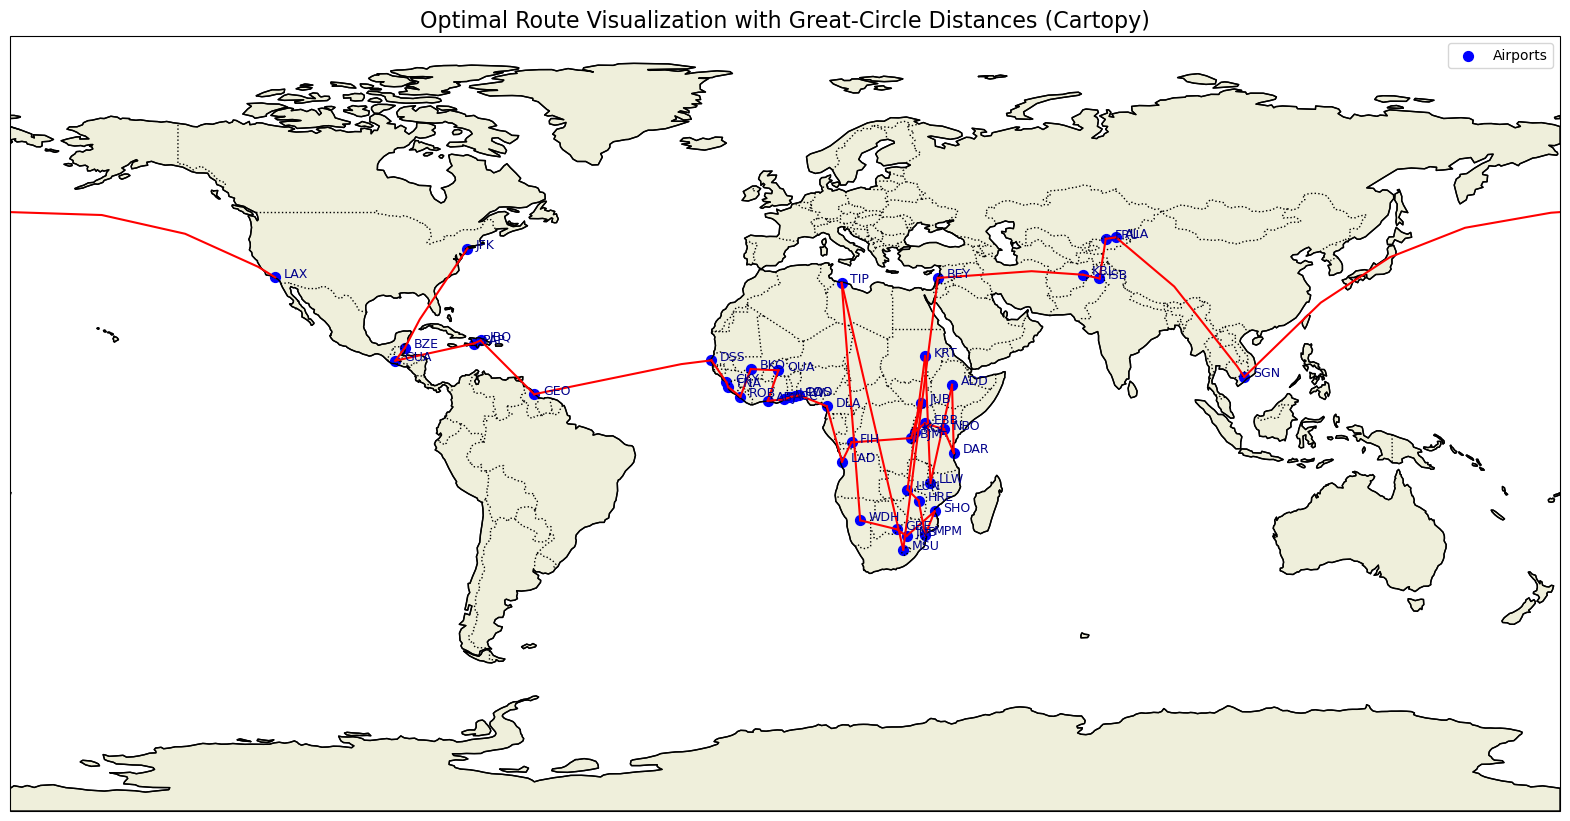

In [5]:
# Step 4: Set up the map with Cartopy
fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot airport locations
ax.scatter(route_lons, route_lats, color='blue', s=50, transform=ccrs.PlateCarree(), label='Airports')

# Annotate airport codes
for lon, lat, code in zip(route_lons, route_lats, optimal_route):
    ax.text(lon + 2, lat, code, transform=ccrs.PlateCarree(), fontsize=9, color='darkblue')

# Plot great-circle routes
for i in range(len(optimal_route) - 1):
    src = airport_coords[optimal_route[i]]
    dest = airport_coords[optimal_route[i + 1]]
    ax.plot([src[0], dest[0]], [src[1], dest[1]], color='red', linewidth=1.5, transform=ccrs.Geodetic())

# Add title and legend
plt.title("Optimal Route Visualization with Great-Circle Distances (Cartopy)", fontsize=16)
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


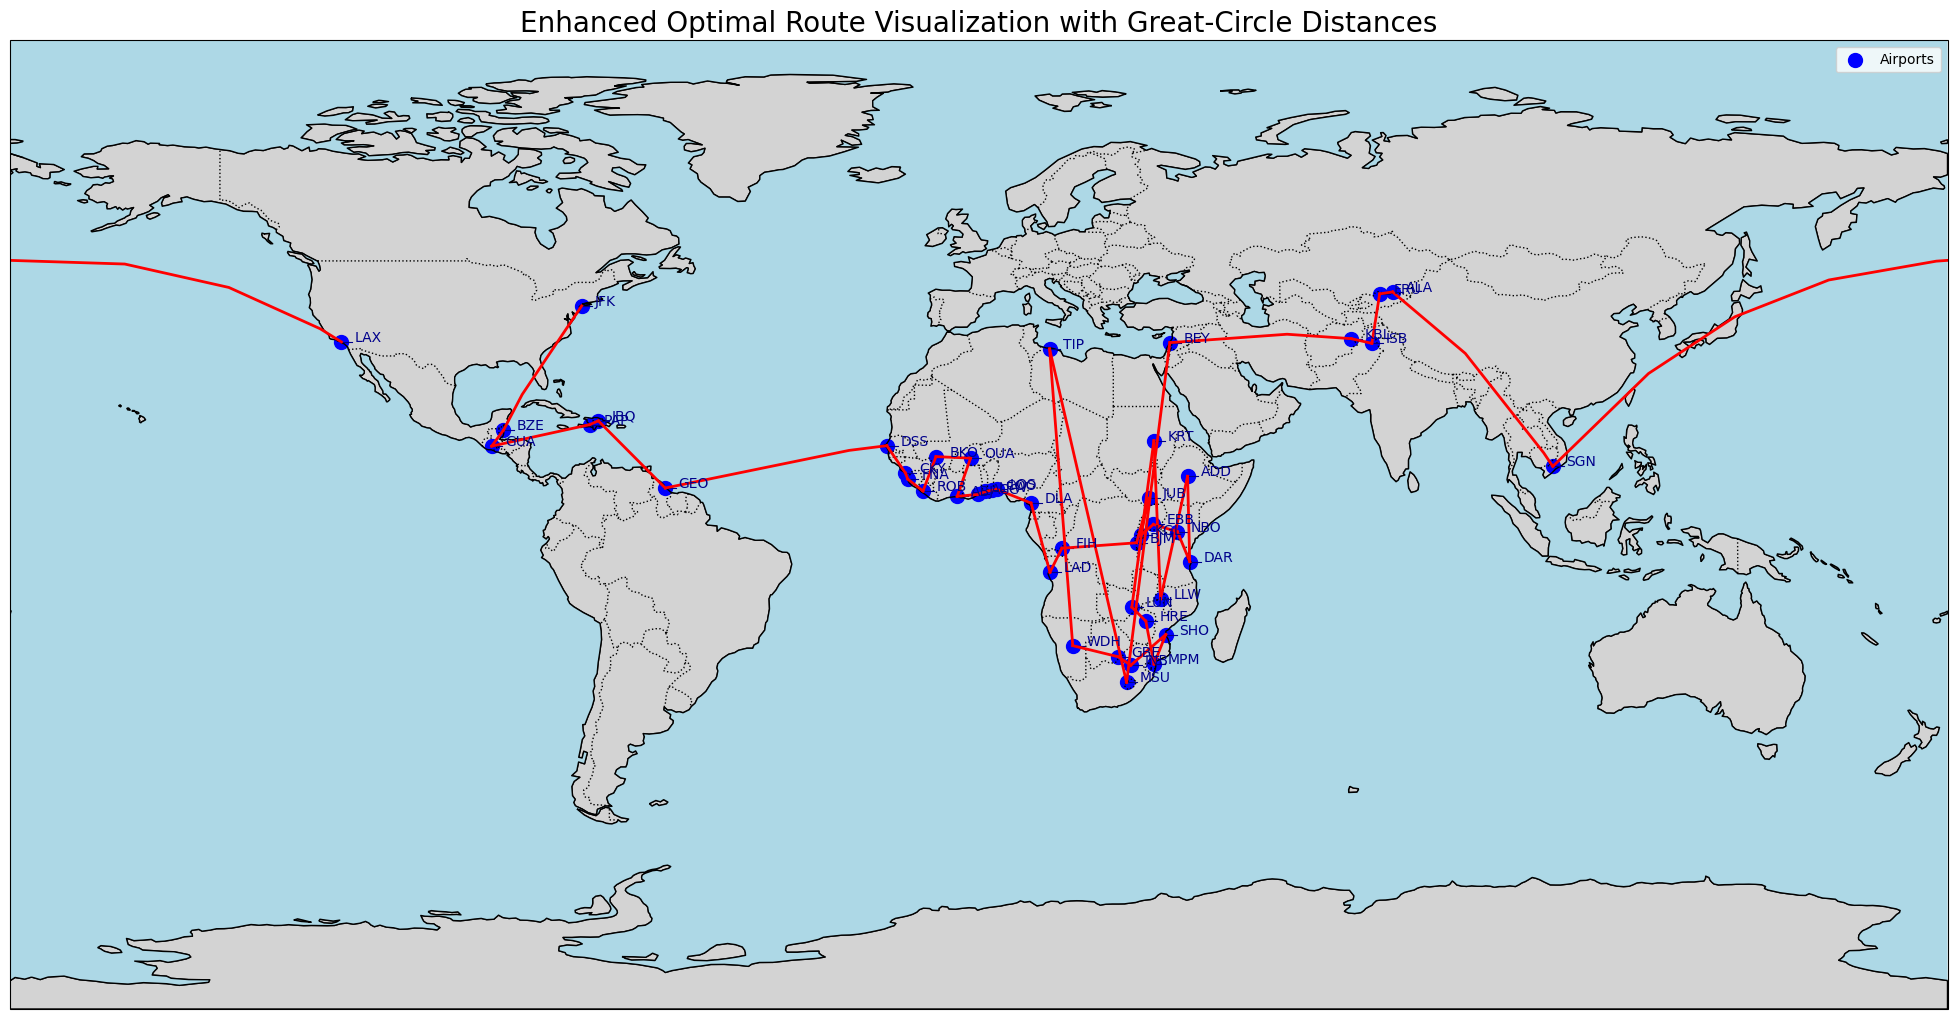

In [7]:
# Step 4: Set up the map with Cartopy
fig = plt.figure(figsize=(25, 15))  # Increased size for better visibility
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')  # Land in light gray
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Water in blue
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot airport locations
ax.scatter(route_lons, route_lats, color='blue', s=100, transform=ccrs.PlateCarree(), label='Airports')

# Annotate airport codes with pointers
for lon, lat, code in zip(route_lons, route_lats, optimal_route):
    ax.plot([lon, lon + 2], [lat, lat], color='darkblue', transform=ccrs.PlateCarree(), linewidth=0.8)
    ax.text(lon + 2.5, lat, code, transform=ccrs.PlateCarree(), fontsize=10, color='darkblue')

# Plot great-circle routes
for i in range(len(optimal_route) - 1):
    src = airport_coords[optimal_route[i]]
    dest = airport_coords[optimal_route[i + 1]]
    ax.plot([src[0], dest[0]], [src[1], dest[1]], color='red', linewidth=2, transform=ccrs.Geodetic())

# Add title and legend
plt.title("Enhanced Optimal Route Visualization with Great-Circle Distances", fontsize=20)
plt.legend()
plt.show()


In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


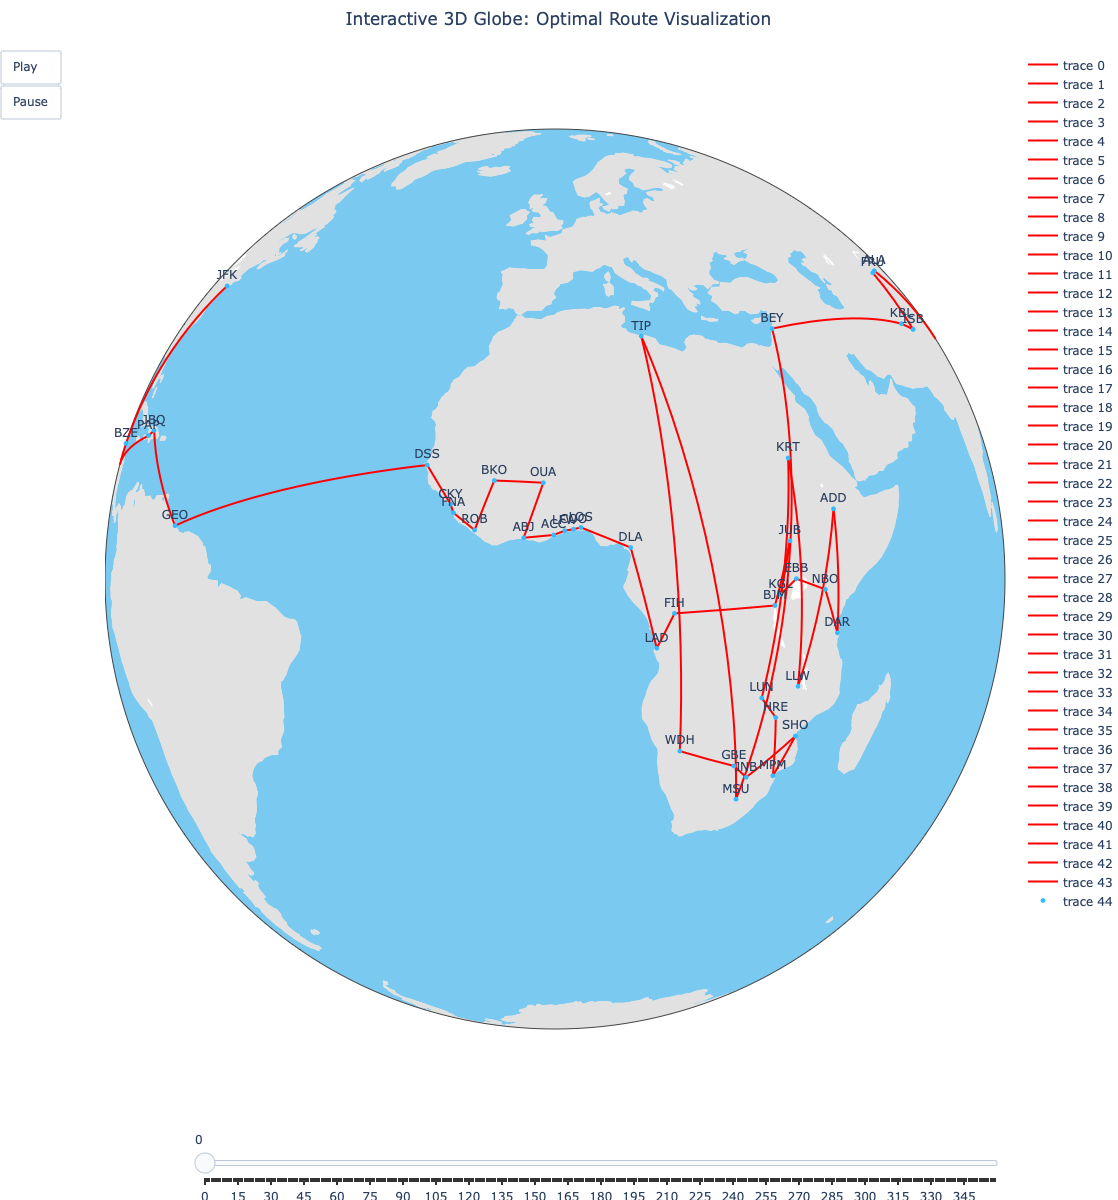

In [57]:
import plotly.graph_objects as go

# Coordinates for the airports (use actual data if available)
airport_coords = {
    'JFK': (-73.7781, 40.6413), 'BZE': (-88.3081, 17.5404), 'GUA': (-90.5069, 14.5833),
    'PAP': (-72.2923, 18.5801), 'JBQ': (-70.6892, 19.2869), 'GEO': (-58.2541, 6.8013),
    'DSS': (-17.0733, 14.6715), 'CKY': (-13.612, 9.576), 'FNA': (-13.1956, 8.465),
    'ROB': (-10.3583, 6.2428), 'BKO': (-7.9499, 12.6392), 'OUA': (-1.5201, 12.353),
    'ABJ': (-4.0079, 5.2559), 'ACC': (-0.171, 5.6148), 'LFW': (1.254, 6.1659),
    'COO': (2.3844, 6.357), 'LOS': (3.3211, 6.5771), 'DLA': (9.7085, 4.0058),
    'LAD': (13.2312, -8.8513), 'FIH': (15.4456, -4.3857), 'BJM': (29.3168, -3.3762),
    'JUB': (31.6011, 4.872), 'KGL': (30.1044, -1.9635), 'EBB': (32.442, 0.042),
    'NBO': (36.9278, -1.3192), 'DAR': (39.2026, -6.875), 'ADD': (38.7993, 8.9772),
    'LLW': (33.7806, -13.7898), 'KRT': (32.5415, 15.6021), 'LUN': (28.4469, -15.3297),
    'HRE': (31.041, -17.9318), 'MPM': (32.5661, -25.9208), 'SHO': (34.7491, -20.417),
    'JNB': (28.246, -26.1335), 'GBE': (25.917, -24.5504), 'WDH': (17.4649, -22.486),
    'TIP': (13.159, 32.6635), 'MSU': (27.4644, -29.3004), 'BEY': (35.4987, 33.8111),
    'KBL': (69.2123, 34.5539), 'ISB': (73.0448, 33.6832), 'FRU': (74.495, 42.8778),
    'ALA': (76.8893, 43.238), 'SGN': (106.6617, 10.8231), 'LAX': (-118.4079, 33.9416)
}

# Optimal route based on solution
optimal_route = [
    'JFK', 'BZE', 'GUA', 'PAP', 'JBQ', 'GEO', 'DSS', 'CKY', 'FNA', 'ROB',
    'BKO', 'OUA', 'ABJ', 'ACC', 'LFW', 'COO', 'LOS', 'DLA', 'LAD', 'FIH',
    'BJM', 'JUB', 'KGL', 'EBB', 'NBO', 'DAR', 'ADD', 'LLW', 'KRT', 'LUN',
    'HRE', 'MPM', 'SHO', 'JNB', 'GBE', 'WDH', 'TIP', 'MSU', 'BEY', 'KBL',
    'ISB', 'FRU', 'ALA', 'SGN', 'LAX'
]

# Extract coordinates for the route
route_lons = [airport_coords[code][0] for code in optimal_route]
route_lats = [airport_coords[code][1] for code in optimal_route]

# Create a globe using Plotly
fig = go.Figure()

# Add the great-circle routes
for i in range(len(optimal_route) - 1):
    src = airport_coords[optimal_route[i]]
    dest = airport_coords[optimal_route[i + 1]]
    fig.add_trace(go.Scattergeo(
        lon=[src[0], dest[0]],
        lat=[src[1], dest[1]],
        mode='lines',
        line=dict(width=2, color='red'),
        opacity=1
    ))

# Add airport locations
fig.add_trace(go.Scattergeo(
    lon=route_lons,
    lat=route_lats,
    mode='markers+text',
    marker=dict(size=5, color='#33BBFF'),
    text=optimal_route,
    textposition="top center",
    hoverinfo='text'
))

# Globe settings
fig.update_geos(
    projection_type="orthographic",  
    showcoastlines=True,
    coastlinecolor="#E1E1E1",  
    showland=True,
    landcolor="#E1E1E1", 
    showocean=True,
    oceancolor="#79C9F0"  
)


# Layout settings
fig.update_layout(
    title="Interactive 3D Globe: Optimal Route Visualization",
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0),
)

fig.update_layout(
    title="Interactive 3D Globe: Optimal Route Visualization",
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0),
    height=1000,  # Adjust height
    width=1000    # Adjust width
)


# Add spinning effect to the globe
fig.update_layout(
    title="Interactive 3D Globe: Optimal Route Visualization",
    title_x=0.5,
    margin=dict(l=0, r=0, t=50, b=0),
    height=1200,  # Globe size
    width=1200,
    updatemenus=[  # Add animation buttons
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)],
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")],
                ),
            ],
        )
    ],
    sliders=[  # Add a slider for smooth rotation
        dict(
            steps=[
                dict(
                    method="animate",
                    args=[[f"frame{i}"], dict(mode="immediate", frame=dict(duration=0, redraw=True))],
                    label=str(i),
                )
                for i in range(360)
            ],
            transition=dict(duration=0),
            x=0.1,
            len=0.9,
        )
    ],
)

# Generate frames for smooth rotation
frames = [
    go.Frame(
        layout=dict(
            geo=dict(
                projection_rotation_lon=i  # Rotate the globe's longitude
            )
        )
    )
    for i in range(360)  # 360 degrees for a full spin
]

fig.frames = frames

# Display the spinning globe
fig.show()



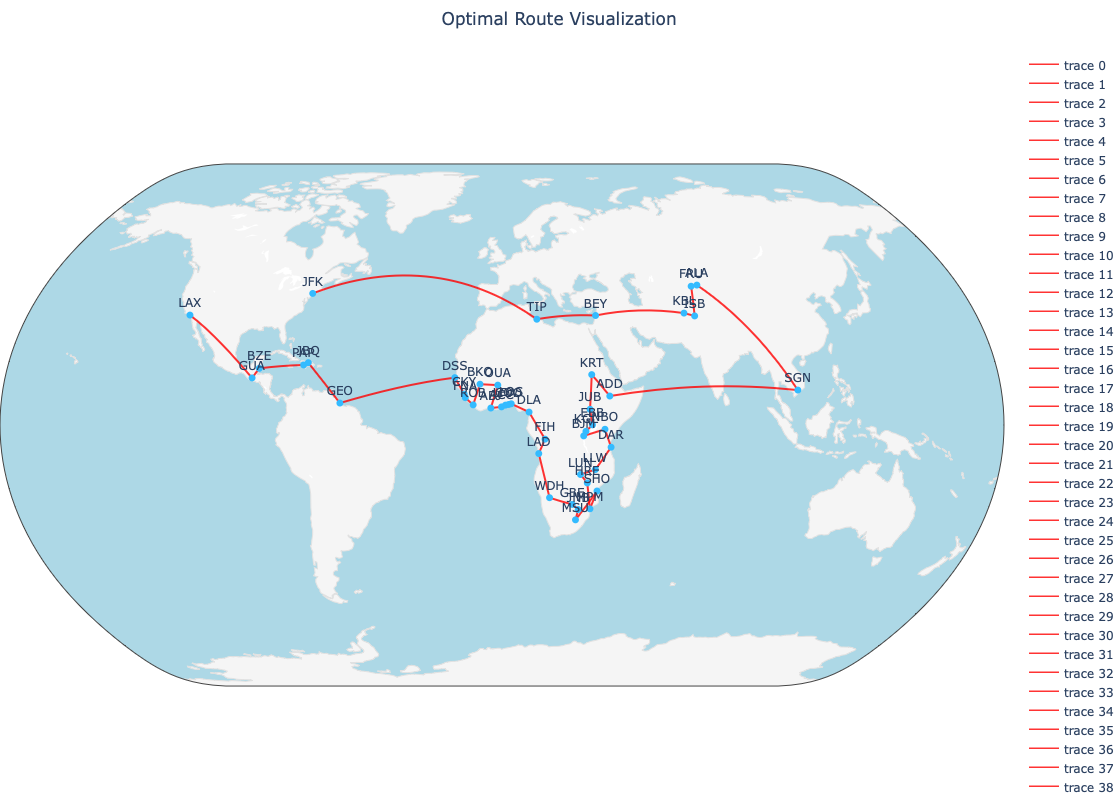

In [79]:
import plotly.graph_objects as go

# Coordinates for the airports
airport_coords = {
    'JFK': (-73.7781, 40.6413), 'BZE': (-88.3081, 17.5404), 'GUA': (-90.5069, 14.5833),
    'PAP': (-72.2923, 18.5801), 'JBQ': (-70.6892, 19.2869), 'GEO': (-58.2541, 6.8013),
    'DSS': (-17.0733, 14.6715), 'CKY': (-13.612, 9.576), 'FNA': (-13.1956, 8.465),
    'ROB': (-10.3583, 6.2428), 'BKO': (-7.9499, 12.6392), 'OUA': (-1.5201, 12.353),
    'ABJ': (-4.0079, 5.2559), 'ACC': (-0.171, 5.6148), 'LFW': (1.254, 6.1659),
    'COO': (2.3844, 6.357), 'LOS': (3.3211, 6.5771), 'DLA': (9.7085, 4.0058),
    'LAD': (13.2312, -8.8513), 'FIH': (15.4456, -4.3857), 'BJM': (29.3168, -3.3762),
    'JUB': (31.6011, 4.872), 'KGL': (30.1044, -1.9635), 'EBB': (32.442, 0.042),
    'NBO': (36.9278, -1.3192), 'DAR': (39.2026, -6.875), 'ADD': (38.7993, 8.9772),
    'LLW': (33.7806, -13.7898), 'KRT': (32.5415, 15.6021), 'LUN': (28.4469, -15.3297),
    'HRE': (31.041, -17.9318), 'MPM': (32.5661, -25.9208), 'SHO': (34.7491, -20.417),
    'JNB': (28.246, -26.1335), 'GBE': (25.917, -24.5504), 'WDH': (17.4649, -22.486),
    'TIP': (13.159, 32.6635), 'MSU': (27.4644, -29.3004), 'BEY': (35.4987, 33.8111),
    'KBL': (69.2123, 34.5539), 'ISB': (73.0448, 33.6832), 'FRU': (74.495, 42.8778),
    'ALA': (76.8893, 43.238), 'SGN': (106.6617, 10.8231), 'LAX': (-118.4079, 33.9416)
}

# Updated optimal path
optimal_path = [
    'JFK', 'TIP', 'BEY', 'KBL', 'ISB', 'FRU', 'ALA', 'SGN', 'ADD', 'KRT',
    'JUB', 'EBB', 'KGL', 'BJM', 'NBO', 'DAR', 'LLW', 'LUN', 'HRE', 'MPM',
    'SHO', 'MSU', 'JNB', 'GBE', 'WDH', 'LAD', 'FIH', 'DLA', 'LOS', 'COO',
    'LFW', 'ACC', 'ABJ', 'OUA', 'BKO', 'ROB', 'FNA', 'CKY', 'DSS', 'GEO',
    'JBQ', 'PAP', 'BZE', 'GUA', 'LAX'
]

# Extract coordinates for the route
route_lons = [airport_coords[code][0] for code in optimal_path]
route_lats = [airport_coords[code][1] for code in optimal_path]

# Create the figure
fig = go.Figure()

# Add great-circle routes
for i in range(len(optimal_path) - 1):
    src = airport_coords[optimal_path[i]]
    dest = airport_coords[optimal_path[i + 1]]
    fig.add_trace(go.Scattergeo(
        lon=[src[0], dest[0]],
        lat=[src[1], dest[1]],
        mode='lines',
        line=dict(width=2, color='red'),
        opacity=0.8
    ))

# Add airport markers
fig.add_trace(go.Scattergeo(
    lon=route_lons,
    lat=route_lats,
    mode='markers+text',
    marker=dict(size=7, color='#33BBFF'),
    text=optimal_path,
    textposition="top center",
    hoverinfo='text'
))

# Update map style
fig.update_geos(
    projection_type="natural earth",  # Flat map projection
    showcoastlines=True,
    coastlinecolor="#E1E1E1",
    showland=True,
    landcolor="#F5F5F5",  # Light gray land
    showocean=True,
    oceancolor="#ADD8E6",  # Light blue ocean
)

# Update layout for better visibility
fig.update_layout(
    title="Optimal Route Visualization",
    title_x=0.5,
    height=800,  # Adjust map size
    width=1200,  # Adjust map size
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the map
fig.show()


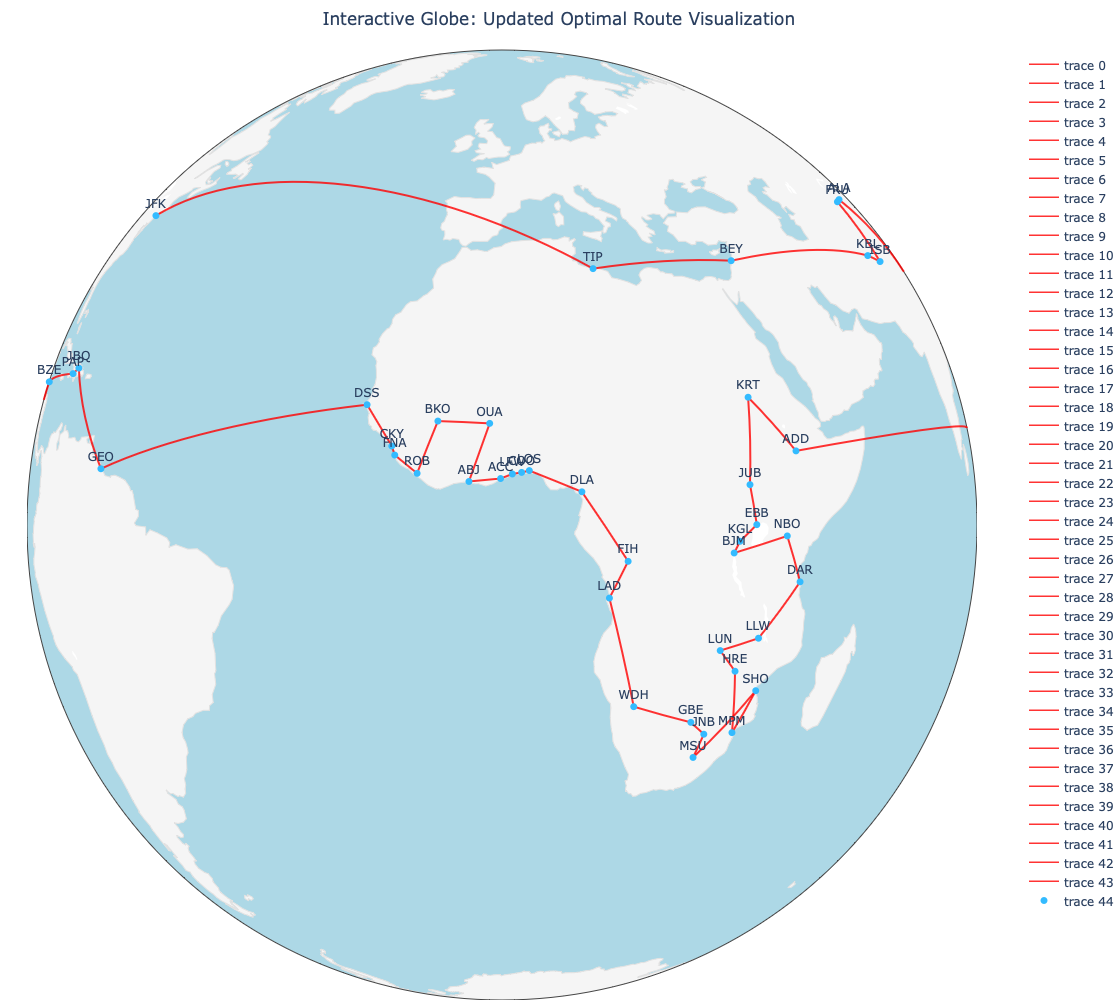

In [69]:
import plotly.graph_objects as go

# Coordinates for the airports
airport_coords = {
    'JFK': (-73.7781, 40.6413), 'BZE': (-88.3081, 17.5404), 'GUA': (-90.5069, 14.5833),
    'PAP': (-72.2923, 18.5801), 'JBQ': (-70.6892, 19.2869), 'GEO': (-58.2541, 6.8013),
    'DSS': (-17.0733, 14.6715), 'CKY': (-13.612, 9.576), 'FNA': (-13.1956, 8.465),
    'ROB': (-10.3583, 6.2428), 'BKO': (-7.9499, 12.6392), 'OUA': (-1.5201, 12.353),
    'ABJ': (-4.0079, 5.2559), 'ACC': (-0.171, 5.6148), 'LFW': (1.254, 6.1659),
    'COO': (2.3844, 6.357), 'LOS': (3.3211, 6.5771), 'DLA': (9.7085, 4.0058),
    'LAD': (13.2312, -8.8513), 'FIH': (15.4456, -4.3857), 'BJM': (29.3168, -3.3762),
    'JUB': (31.6011, 4.872), 'KGL': (30.1044, -1.9635), 'EBB': (32.442, 0.042),
    'NBO': (36.9278, -1.3192), 'DAR': (39.2026, -6.875), 'ADD': (38.7993, 8.9772),
    'LLW': (33.7806, -13.7898), 'KRT': (32.5415, 15.6021), 'LUN': (28.4469, -15.3297),
    'HRE': (31.041, -17.9318), 'MPM': (32.5661, -25.9208), 'SHO': (34.7491, -20.417),
    'JNB': (28.246, -26.1335), 'GBE': (25.917, -24.5504), 'WDH': (17.4649, -22.486),
    'TIP': (13.159, 32.6635), 'MSU': (27.4644, -29.3004), 'BEY': (35.4987, 33.8111),
    'KBL': (69.2123, 34.5539), 'ISB': (73.0448, 33.6832), 'FRU': (74.495, 42.8778),
    'ALA': (76.8893, 43.238), 'SGN': (106.6617, 10.8231), 'LAX': (-118.4079, 33.9416)
}

# Updated optimal path
optimal_path = [
    'JFK', 'TIP', 'BEY', 'KBL', 'ISB', 'FRU', 'ALA', 'SGN', 'ADD', 'KRT',
    'JUB', 'EBB', 'KGL', 'BJM', 'NBO', 'DAR', 'LLW', 'LUN', 'HRE', 'MPM',
    'SHO', 'MSU', 'JNB', 'GBE', 'WDH', 'LAD', 'FIH', 'DLA', 'LOS', 'COO',
    'LFW', 'ACC', 'ABJ', 'OUA', 'BKO', 'ROB', 'FNA', 'CKY', 'DSS', 'GEO',
    'JBQ', 'PAP', 'BZE', 'GUA', 'LAX'
]

# Extract coordinates for the route
route_lons = [airport_coords[code][0] for code in optimal_path]
route_lats = [airport_coords[code][1] for code in optimal_path]

# Create the figure
fig = go.Figure()

# Add great-circle routes
for i in range(len(optimal_path) - 1):
    src = airport_coords[optimal_path[i]]
    dest = airport_coords[optimal_path[i + 1]]
    fig.add_trace(go.Scattergeo(
        lon=[src[0], dest[0]],
        lat=[src[1], dest[1]],
        mode='lines',
        line=dict(width=2, color='red'),
        opacity=0.8
    ))

# Add airport markers
fig.add_trace(go.Scattergeo(
    lon=route_lons,
    lat=route_lats,
    mode='markers+text',
    marker=dict(size=7, color='#33BBFF'),
    text=optimal_path,
    textposition="top center",
    hoverinfo='text'
))

# Globe settings
fig.update_geos(
    projection_type="orthographic",  
    showcoastlines=True,
    coastlinecolor="#E1E1E1",
    showland=True,
    landcolor="#F5F5F5",  
    showocean=True,
    oceancolor="#ADD8E6", 

# Update layout for better visibility
fig.update_layout(
    title="Interactive Globe: Updated Optimal Route Visualization",
    title_x=0.5,
    height=1000,  
    width=1000,  
    margin=dict(l=0, r=0, t=50, b=0)
)


fig.show()


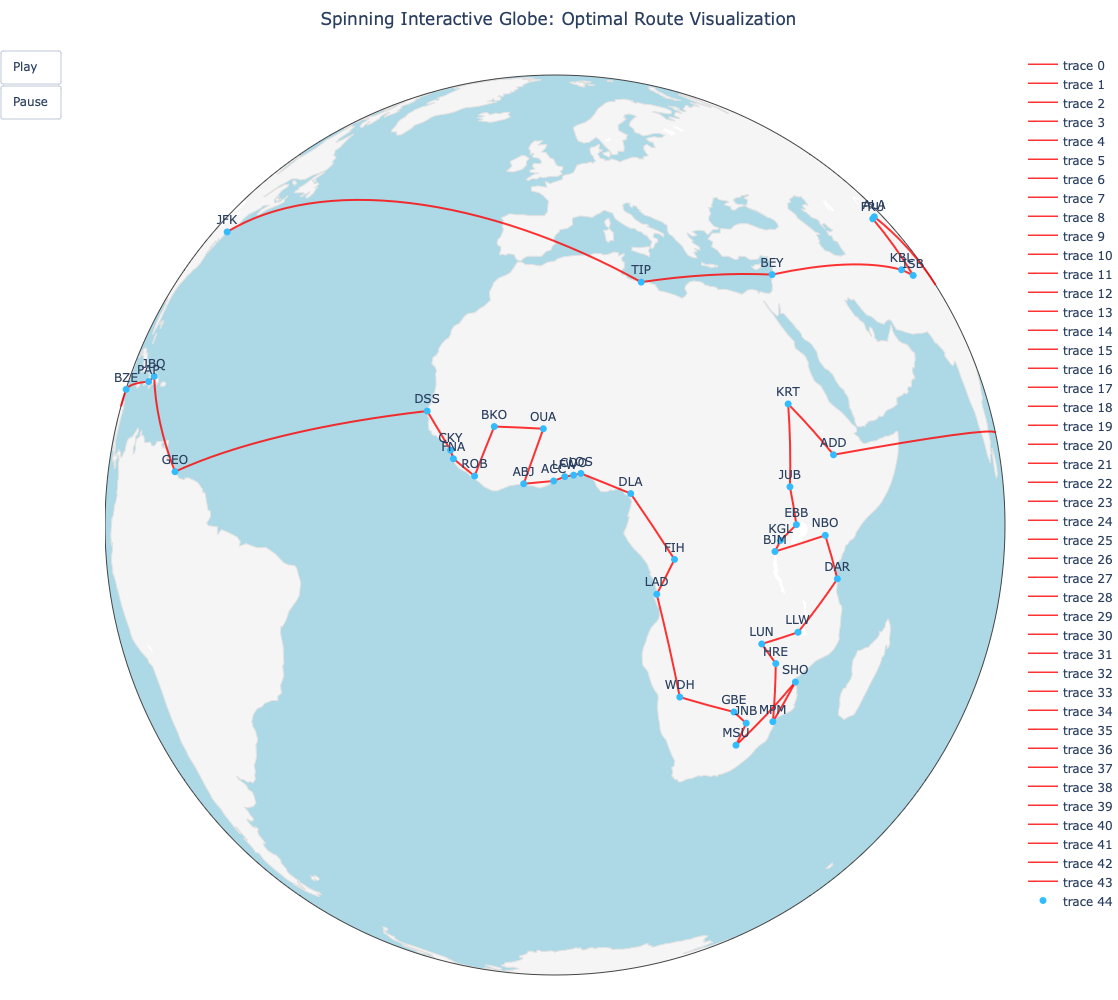

In [87]:
import plotly.graph_objects as go

# Coordinates for the airports
airport_coords = {
    'JFK': (-73.7781, 40.6413), 'BZE': (-88.3081, 17.5404), 'GUA': (-90.5069, 14.5833),
    'PAP': (-72.2923, 18.5801), 'JBQ': (-70.6892, 19.2869), 'GEO': (-58.2541, 6.8013),
    'DSS': (-17.0733, 14.6715), 'CKY': (-13.612, 9.576), 'FNA': (-13.1956, 8.465),
    'ROB': (-10.3583, 6.2428), 'BKO': (-7.9499, 12.6392), 'OUA': (-1.5201, 12.353),
    'ABJ': (-4.0079, 5.2559), 'ACC': (-0.171, 5.6148), 'LFW': (1.254, 6.1659),
    'COO': (2.3844, 6.357), 'LOS': (3.3211, 6.5771), 'DLA': (9.7085, 4.0058),
    'LAD': (13.2312, -8.8513), 'FIH': (15.4456, -4.3857), 'BJM': (29.3168, -3.3762),
    'JUB': (31.6011, 4.872), 'KGL': (30.1044, -1.9635), 'EBB': (32.442, 0.042),
    'NBO': (36.9278, -1.3192), 'DAR': (39.2026, -6.875), 'ADD': (38.7993, 8.9772),
    'LLW': (33.7806, -13.7898), 'KRT': (32.5415, 15.6021), 'LUN': (28.4469, -15.3297),
    'HRE': (31.041, -17.9318), 'MPM': (32.5661, -25.9208), 'SHO': (34.7491, -20.417),
    'JNB': (28.246, -26.1335), 'GBE': (25.917, -24.5504), 'WDH': (17.4649, -22.486),
    'TIP': (13.159, 32.6635), 'MSU': (27.4644, -29.3004), 'BEY': (35.4987, 33.8111),
    'KBL': (69.2123, 34.5539), 'ISB': (73.0448, 33.6832), 'FRU': (74.495, 42.8778),
    'ALA': (76.8893, 43.238), 'SGN': (106.6617, 10.8231), 'LAX': (-118.4079, 33.9416)
}

# Updated optimal path
optimal_path = [
    'JFK', 'TIP', 'BEY', 'KBL', 'ISB', 'FRU', 'ALA', 'SGN', 'ADD', 'KRT',
    'JUB', 'EBB', 'KGL', 'BJM', 'NBO', 'DAR', 'LLW', 'LUN', 'HRE', 'MPM',
    'SHO', 'MSU', 'JNB', 'GBE', 'WDH', 'LAD', 'FIH', 'DLA', 'LOS', 'COO',
    'LFW', 'ACC', 'ABJ', 'OUA', 'BKO', 'ROB', 'FNA', 'CKY', 'DSS', 'GEO',
    'JBQ', 'PAP', 'BZE', 'GUA', 'LAX'
]

# Extract coordinates for the route
route_lons = [airport_coords[code][0] for code in optimal_path]
route_lats = [airport_coords[code][1] for code in optimal_path]

# Create the figure
fig = go.Figure()

# Add great-circle routes
for i in range(len(optimal_path) - 1):
    src = airport_coords[optimal_path[i]]
    dest = airport_coords[optimal_path[i + 1]]
    fig.add_trace(go.Scattergeo(
        lon=[src[0], dest[0]],
        lat=[src[1], dest[1]],
        mode='lines',
        line=dict(width=2, color='red'),
        opacity=0.8
    ))

# Add airport markers
fig.add_trace(go.Scattergeo(
    lon=route_lons,
    lat=route_lats,
    mode='markers+text',
    marker=dict(size=7, color='#33BBFF'),
    text=optimal_path,
    textposition="top center",
    hoverinfo='text'
))

# Globe settings
fig.update_geos(
    projection_type="orthographic",  
    showcoastlines=True,
    coastlinecolor="#E1E1E1",
    showland=True,
    landcolor="#F5F5F5",  
    showocean=True,
    oceancolor="#ADD8E6",  
)

# Generate animation frames for spinning
frames = [
    go.Frame(
        layout=dict(
            geo=dict(
                projection_rotation_lon=lon  # Rotate the longitude
            )
        )
    )
    for lon in range(0, 360, 1)  # Spin the globe 360 degrees
]

fig.frames = frames

# Add play/pause buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)],
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")],
                ),
            ],
        )
    ]
)

# Layout for better visibility
fig.update_layout(
    title="Spinning Interactive Globe: Optimal Route Visualization",
    title_x=0.5,
    height=1000,  
    width=1000, 
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()
